# Problem Set 0 - Liam Seper

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as pp
import scipy.integrate as scint
import scipy.special as spec
import scipy.stats as stats
import math
import pandas as pd
import seaborn as sn
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')


REG_ROUND = 4
SPEC_ROUND = 6

### Question 1

We can use Bayes Theorem to calculate this like so,

$\displaystyle \frac{P(no \ sled | snow) \cdot P(snow)}{P(no \ sled)} \\ 
\begin{align*}
P(no \ sled) &= P(no \ sled \cap snow) + P( no \ sled \cap no \ snow) \\
&= (0.025 \cdot 0.3) + P(0.9 \cdot 0.7) \\
&= 0.6375 \\
\end{align*}
$ 

So then our probability is so,

$
\begin{align*}
P(snow | no sled) &= \displaystyle \frac{P(no \ sled | snow) \cdot P(snow)}{P(no \ sled)} \\ 
&= \frac{0.025 \cdot 0.3}{0.6375} \\
&\approx .0118
\end{align*}
$

### Question 2

In [2]:
# nCk * p^k * (1 - p)^(n - k)
def binom(n, p, bBound, tBound):
    agg = 0
    for i in range(bBound, tBound):
        agg += spec.comb(n, i) * (p ** i) * (1 - p) ** (n - i)
    return agg
WORMS = 5
prob = binom(5, .6, 0, 3)
print(f'Probability that the bird does not get enough food that day: {round(prob, REG_ROUND)}')

Probability that the bird does not get enough food that day: 0.3174


### Question 3

In [3]:
# rolling a 5 or 10
UNIQUE_ROLLS = 36
pDiv5 = 7 / UNIQUE_ROLLS

atLeast20 = binom(70, pDiv5, 20, 71)
exactly35 = binom(70, pDiv5, 35, 36)
between15and25 = binom(70, pDiv5, 15, 26)

print(f'At least 20 rolls divisible by 5: {round(atLeast20, REG_ROUND)}')
print(f'Exactly 35 rolls divisible by 5: {round(exactly35, 12)}')
print(f'Between 15 and 25 (inclusive) rolls divisible by 5: {round(between15and25, REG_ROUND)}')

At least 20 rolls divisible by 5: 0.0423
Exactly 35 rolls divisible by 5: 7.432e-09
Between 15 and 25 (inclusive) rolls divisible by 5: 0.3829


### Question 4

In [4]:
sigma = math.sqrt(14)
mu = 2
dist = stats.lognorm(s = sigma, scale = math.exp(mu)).pdf

between4and6 = scint.quad(dist, 4, 6)[0]
lessthan1 = scint.quad(dist, -np.inf, 1)[0]

print(f'Probability electriciry consumption will be between 4 and 6 kilowatt/hours: {round(between4and6, REG_ROUND)}')
print(f'Probability electriciry consumption will be less than kilowatt/hours: {round(lessthan1, REG_ROUND)}')

Probability electriciry consumption will be between 4 and 6 kilowatt/hours: 0.043
Probability electriciry consumption will be less than kilowatt/hours: 0.2965


### Question 5

Expected value of Y: 14 | Variance of Y: 14


Text(0.5, 1.0, 'Combined Poisson Distributions')

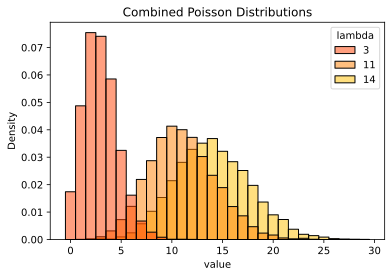

In [5]:
sn.set_palette('autumn')

OBSERVATIONS = 10000

lambda1 = 11
lambda2 = 3
newLambda = lambda1 + lambda2
print(f'Expected value of Y: {newLambda} | Variance of Y: {newLambda}')

l11Df = pd.DataFrame({'value' : np.random.poisson(lam=lambda1, size=OBSERVATIONS), 'lambda' : lambda1})
l3Df = pd.DataFrame({'value' : np.random.poisson(lam=lambda2, size=OBSERVATIONS), 'lambda' : lambda2})
combinedDf = pd.DataFrame({'value' : np.random.poisson(lam=newLambda, size=OBSERVATIONS), 'lambda' : newLambda})
values = pd.DataFrame(columns=['value', 'lambda'])
values = values.append(l11Df.append(l3Df).append(combinedDf))
ax = sn.histplot(data=values, x='value', stat='density', hue='lambda', discrete=True, palette=sn.color_palette('autumn', n_colors=3))
pp.title('Combined Poisson Distributions')

The combined plot seems to be influenced by X2 a lot more than X1, probably because you are adding the two distributions and X2 has a higher value, and is closer to the combined expected value than X1.

### Question 6

In [6]:
def tStatistic(confidence, dOF, tails='both'):
    tDist = stats.t(dOF).ppf
    tStatistic = tDist((1 - confidence) / 2)
    if(tails == 'both'):
        return tStatistic, -tStatistic
    if(tails == 'left'):
        return tStatistic
    return -tStatistic

def confInterval(statistics, mean, n, std):
    marginErr = std / math.sqrt(n)
    conf_int = []
    for statistic in statistics:
        conf_int.append(mean + statistic * marginErr)
    return conf_int

In [7]:
n = 15
popMean = 21900
sampMean = 17750
sampSTD = 5500

tStats = tStatistic(0.95, n - 1)
interval = confInterval(tStats, sampMean, n, sampSTD)
print(f'The estimated mean battery life is between {round(interval[0] / 8760, REG_ROUND)} and {round(interval[1] / 8760, REG_ROUND)} years')
print('Since the claimed mean of 2.5 years is not included, the firm should come to the conclusion that the company is lying.')

The estimated mean battery life is between 1.6786 and 2.3739 years
Since the claimed mean of 2.5 years is not included, the firm should come to the conclusion that the company is lying.


## Iris Dataset

### Question 1

In [8]:
df = pd.read_csv("iris.data", names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [9]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
print(f'Number of observations: {df.shape[0]} | Number of features: {df.shape[1]}')

Number of observations: 150 | Number of features: 5


### Question 2

Sepal Length: The length of the sepal of the flower in cm

Sepal Width: The width of the sepal of the flower in cm 

Petal Length: The length of the petal of the flower in cm

Petal Width: The width of the petal of the flower in cm

Class: The sub-species of flower

### Question 3

Text(0.5, 1.0, 'Scatterplot of Sepal Width vs. Sepal Length')

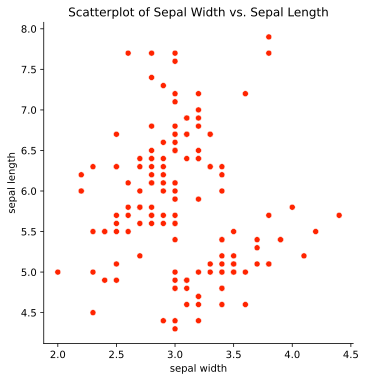

In [11]:
sn.relplot(data=df, x='sepal width', y='sepal length')
pp.title('Scatterplot of Sepal Width vs. Sepal Length')

In [12]:
correlation = df[['sepal width', 'sepal length']].corr()['sepal length'][0]
print(f'The correlation is {round(correlation, SPEC_ROUND)}, which means it is very weak. This means that as sepal width increases, sepal length (loosely) decreases')

The correlation is -0.109369, which means it is very weak. This means that as sepal width increases, sepal length (loosely) decreases


### Question 4

Text(0.5, 1.0, 'Scatterplot of Petal Width vs. Petal Length')

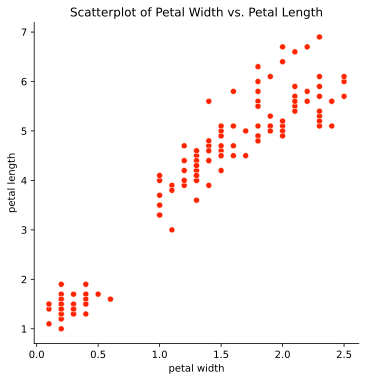

In [13]:
sn.relplot(data=df, x='petal width', y='petal length')
pp.title('Scatterplot of Petal Width vs. Petal Length')

In [14]:
correlation = df[['petal width', 'petal length']].corr()['petal length'][0]
print(f'The correlation is {round(correlation, SPEC_ROUND)}, which is a strong positive correlation. This means that as petal width increases, petal length increases')

The correlation is 0.962757, which is a strong positive correlation. This means that as petal width increases, petal length increases


### Question 5

In [15]:
def get_class_statistics(df, iris_class, stats):
    subset = df[df['class'] == iris_class]
    description = subset.describe()
    print("\n" + iris_class, end='\n')
    for col in description:
        print(f'\t{col}')
        for stat, value in zip(stats, description[col][stats]):
            print(f'\t\t{stat}: {round(value, REG_ROUND)}')
            
stats = ['mean', 'std', 'min', 'max']
get_class_statistics(df, 'Iris-setosa', stats)


Iris-setosa
	sepal length
		mean: 5.006
		std: 0.3525
		min: 4.3
		max: 5.8
	sepal width
		mean: 3.418
		std: 0.381
		min: 2.3
		max: 4.4
	petal length
		mean: 1.464
		std: 0.1735
		min: 1.0
		max: 1.9
	petal width
		mean: 0.244
		std: 0.1072
		min: 0.1
		max: 0.6


### Question 6

In [16]:
get_class_statistics(df, 'Iris-virginica', stats)


Iris-virginica
	sepal length
		mean: 6.588
		std: 0.6359
		min: 4.9
		max: 7.9
	sepal width
		mean: 2.974
		std: 0.3225
		min: 2.2
		max: 3.8
	petal length
		mean: 5.552
		std: 0.5519
		min: 4.5
		max: 6.9
	petal width
		mean: 2.026
		std: 0.2747
		min: 1.4
		max: 2.5


### Question 7

In [17]:
get_class_statistics(df, 'Iris-versicolor', stats)


Iris-versicolor
	sepal length
		mean: 5.936
		std: 0.5162
		min: 4.9
		max: 7.0
	sepal width
		mean: 2.77
		std: 0.3138
		min: 2.0
		max: 3.4
	petal length
		mean: 4.26
		std: 0.4699
		min: 3.0
		max: 5.1
	petal width
		mean: 1.326
		std: 0.1978
		min: 1.0
		max: 1.8


### Question 8

Iris-Setosa seems to have the largest average sepal width, but smallest average sepal length, petal length, and petal width

Iris-Versicolor seems to not have the largest of anything, but the smallest average sepal width

Iris-Virginica seems to have the largest sepal length, petal length, and petal width. 

### Question 9

With a petal length of 0.3, Iris Setosa seems to be the most likely classification, since the other classifications don't even have 0.3 between their min and max values for petal length, not to mention 0.3 is really close to the average petal length for Iris Setosa.

With a petal width of 1.5, you cannot tell by just that alone which classification it falls into, since there are more than one classification who's value range contains 1.5 (Iris-Versicolor and Iris-Virginica). 